<a href="https://colab.research.google.com/github/mohdraavi/Startup/blob/main/Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [401]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score


import matplotlib.pyplot as plt

In [402]:
df =pd.read_csv('/content/50_Startups.csv')

In [403]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [404]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [405]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

##Checking relation between independent variables with dependent.

Text(0.5, 1.0, 'Scatter plot of Profit with Marketing Spend')

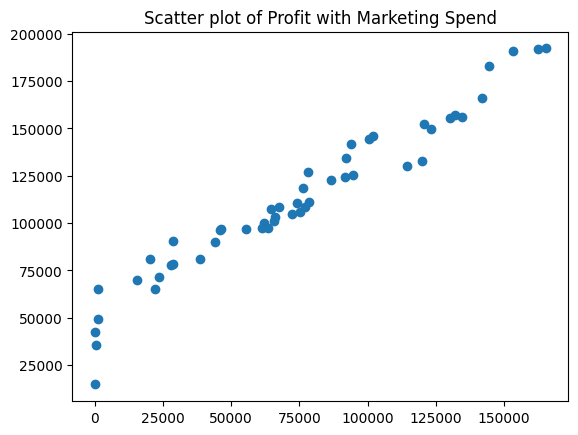

In [406]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.title('Scatter plot of Profit with Marketing Spend')

Text(0.5, 1.0, 'Scatter plot of Profit with Marketing Spend')

<Figure size 1000x2000 with 0 Axes>

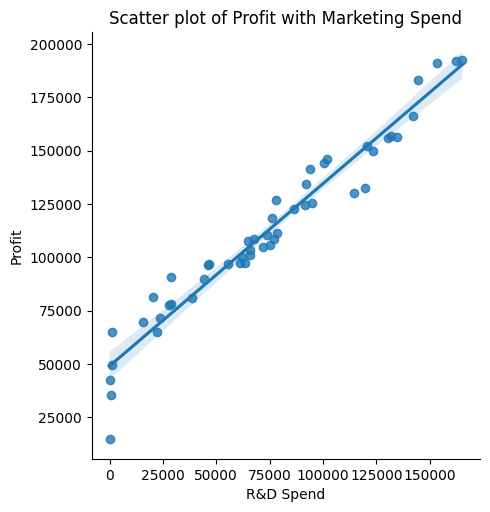

In [407]:
plt.figure(figsize=(10,20))
sns.lmplot(x='R&D Spend',y='Profit',data=df)
plt.title('Scatter plot of Profit with Marketing Spend')

Text(0.5, 1.0, 'Scatter plot of Profit with Marketing Spend')

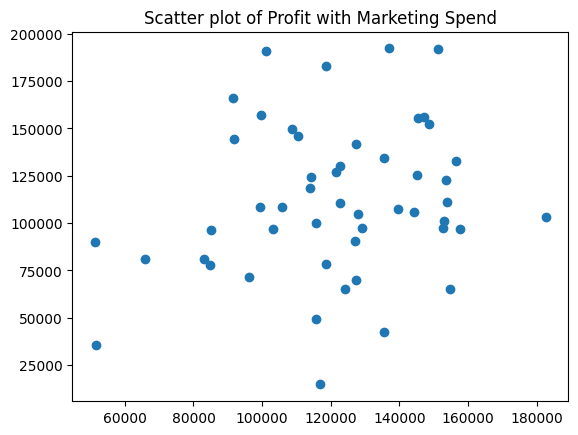

In [408]:
plt.scatter(df['Administration'],df['Profit'])
plt.title('Scatter plot of Profit with Marketing Spend')

Text(0.5, 1.0, 'lmplot plot of Profit with Administration')

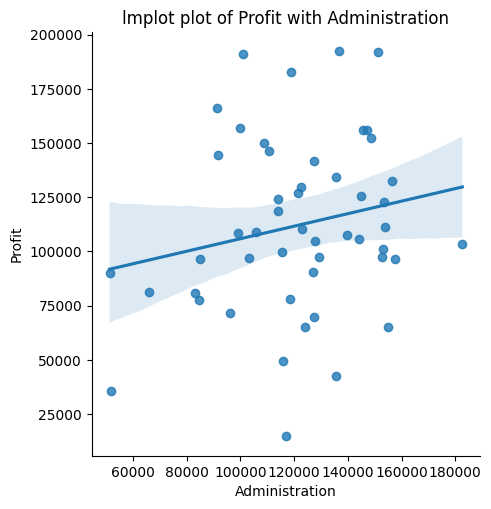

In [409]:
sns.lmplot(x='Administration',y='Profit',data=df)
plt.title('lmplot plot of Profit with Administration')

Text(0.5, 1.0, 'Scatter plot of Profit with Marketing Spend')

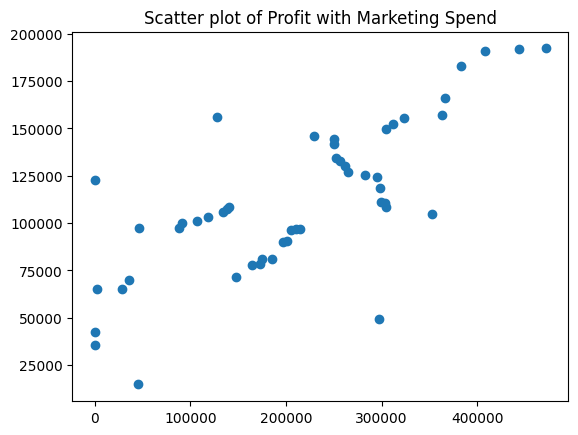

In [410]:
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.title('Scatter plot of Profit with Marketing Spend')

Text(0.5, 1.0, 'lmplot plot of Profit with Administration')

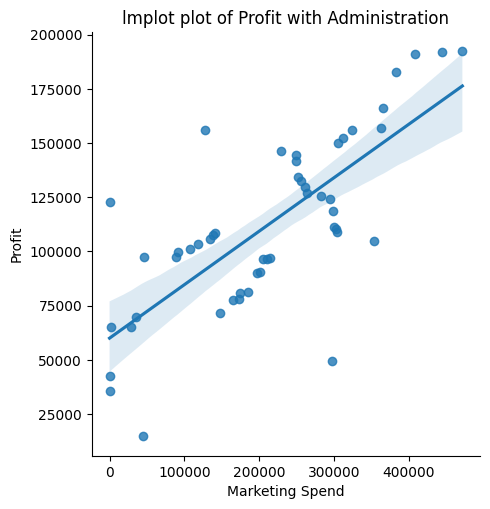

In [411]:
sns.lmplot(x='Marketing Spend',y='Profit',data=df)
plt.title('lmplot plot of Profit with Administration')

In [412]:
state_df = df.groupby(['State'])['Profit'].mean().reset_index()
state_df

,State,Profit
0,California,103905.175294
1,Florida,118774.024375
2,New York,113756.446471


<Axes: xlabel='State', ylabel='Profit'>

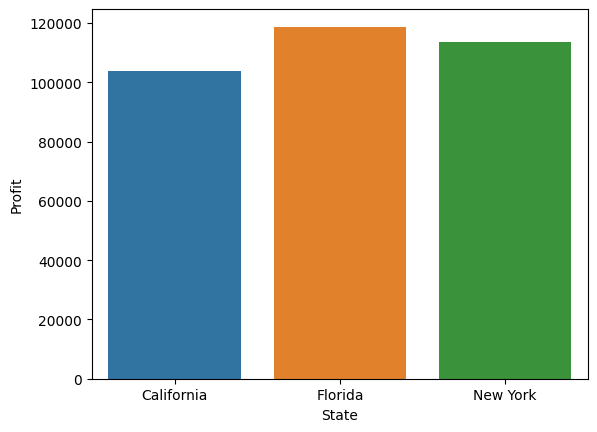

In [413]:
sns.barplot(x=state_df['State'],y=state_df['Profit'],data=state_df)

One hot encoding

In [414]:
encoded_df = pd.get_dummies(df, columns=['State'])


In [415]:
encoded_df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


##Check for outlier

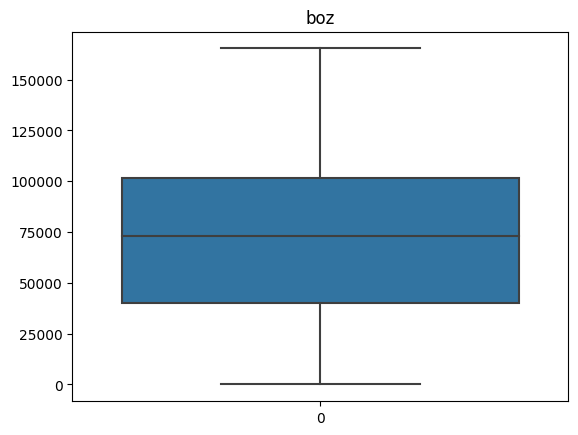

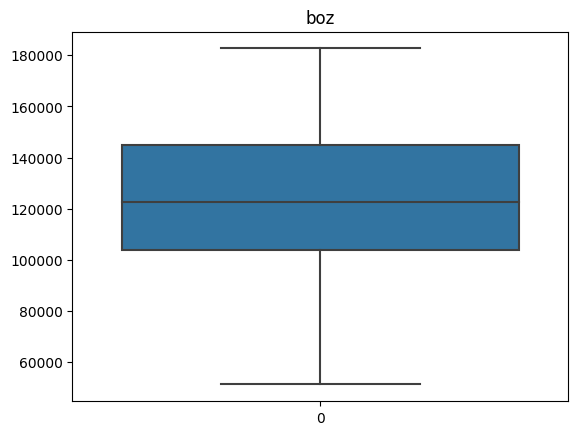

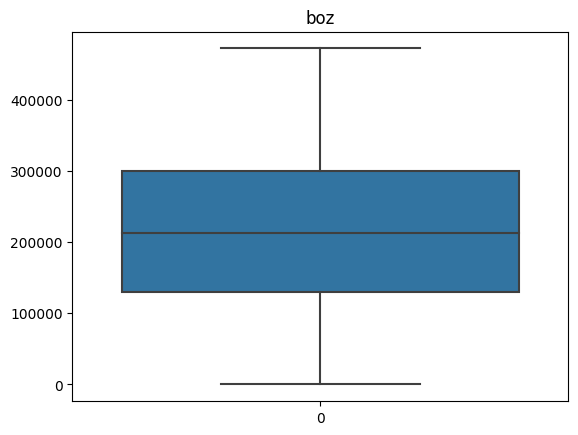

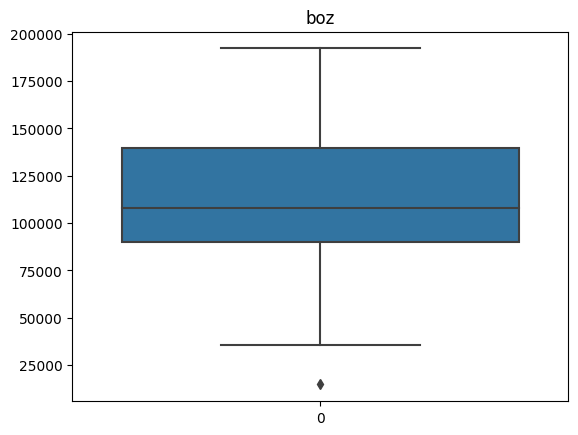

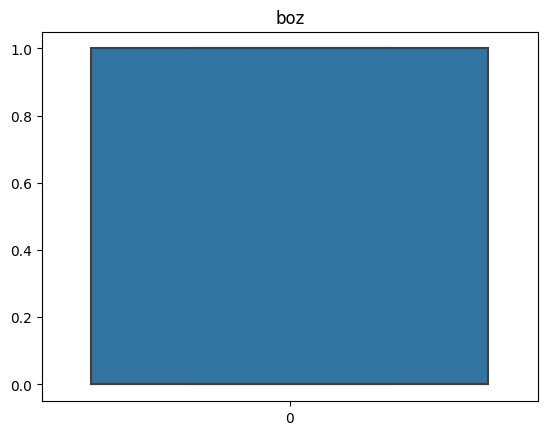

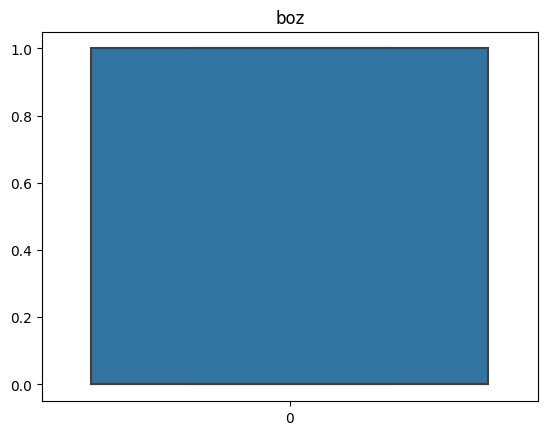

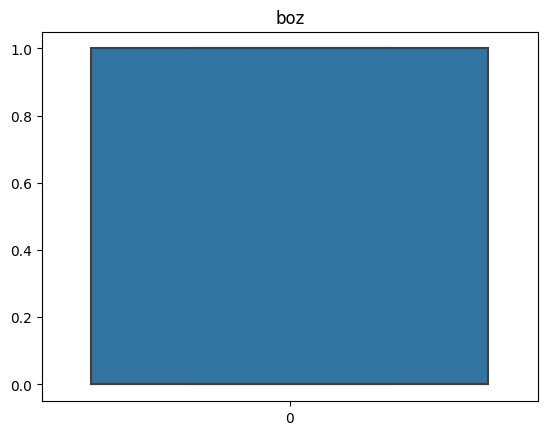

In [416]:
for col in  encoded_df.columns:
  sns.boxplot(encoded_df[col])
  plt.title('boz')
  plt.show()


In [417]:
dependent_variable = 'Profit'

In [418]:
set(encoded_df.columns.tolist())

{'Administration',
 'Marketing Spend',
 'Profit',
 'R&D Spend',
 'State_California',
 'State_Florida',
 'State_New York'}

In [419]:
independent_variables = set(encoded_df.columns.tolist()) -  {dependent_variable}
independent_variables = list(independent_variables)
independent_variables

['R&D Spend',
 'State_Florida',
 'Marketing Spend',
 'Administration',
 'State_California',
 'State_New York']

In [420]:
len(independent_variables)

6

In [421]:
x = encoded_df[independent_variables].values
y = encoded_df[dependent_variable].values

In [422]:
from sklearn.metrics import (r2_score,                # import required metrics
                             mean_squared_error,  mean_absolute_percentage_error,
                             mean_absolute_error)
import warnings

In [423]:
from sklearn.preprocessing import  MinMaxScaler

In [424]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (MinMaxScaler,  # scale the data
                                    StandardScaler,PolynomialFeatures)

In [425]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

##Data Splitting

In [426]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

##Scaling using standardization

In [427]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [428]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [429]:

linear_train_predictions = linear_model.predict(x_train)
linear_test_predictions = linear_model.predict(x_test)


In [430]:
linear_train_accuracy = r2_score(y_train, linear_train_predictions)
linear_test_accuracy = r2_score(y_test, linear_test_predictions)

In [431]:
print(f'Train accuracy of {linear_model} : ',linear_train_accuracy)
print(f'Test accuracy {linear_model}: ',linear_test_accuracy)

Train accuracy of LinearRegression() :  0.9501847627493607
Test accuracy LinearRegression():  0.9347068473282427


In [432]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [433]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [434]:
pipe_train_predictions = pipe.predict(x_train)
pipe_test_predictions = pipe.predict(x_test)

In [435]:
pipe_train_accuracy = r2_score(y_train, pipe_train_predictions)
pipe_test_accuracy = r2_score(y_test, pipe_test_predictions)

In [436]:
print(f'Train accuracy of  polinomial {linear_model} : ',pipe_train_accuracy )
print(f'Test accuracy polinomial  {linear_model}: ',pipe_test_accuracy)

Train accuracy of  polinomial LinearRegression() :  0.9654915589617574
Test accuracy polinomial  LinearRegression():  0.907324573792515


In [437]:
from sklearn.linear_model import Ridge,Lasso

In [438]:
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [439]:
ridge_train_predictions = ridge.predict(x_train)
ridge_test_predictions = ridge.predict(x_test)

In [440]:
ridge_train_accuracy = r2_score(y_train, ridge_train_predictions)
ridge_test_accuracy = r2_score(y_test, ridge_test_predictions)

In [441]:
print(f'Train accuracy of  polinomial {linear_model} : ',ridge_train_accuracy )
print(f'Test accuracy polinomial  {linear_model}: ',ridge_test_accuracy)

Train accuracy of  polinomial LinearRegression() :  0.9492927074811719
Test accuracy polinomial  LinearRegression():  0.9220045315965554


In [442]:
lasso = Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [443]:
lasso_train_predictions = lasso.predict(x_train)
lasso_test_predictions = lasso.predict(x_test)

In [444]:
lasso_train_accuracy = r2_score(y_train, lasso_train_predictions)
lasso_test_accuracy = r2_score(y_test, lasso_test_predictions)

In [445]:
print(f'Train accuracy of  polinomial {linear_model} : ',lasso_train_accuracy)
print(f'Test accuracy polinomial  {linear_model}: ',lasso_test_accuracy )

Train accuracy of  polinomial LinearRegression() :  0.9501847604343415
Test accuracy polinomial  LinearRegression():  0.9347275438411206


In [446]:
from sklearn.ensemble import RandomForestRegressor

In [447]:
forest = RandomForestRegressor(n_estimators=50)
forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [448]:
forest_train_predictions = forest.predict(x_train)
forest_test_predictions = forest.predict(x_test)

In [449]:
forest_train_accuracy = r2_score(y_train, forest_train_predictions)
forest_test_accuracy = r2_score(y_test, forest_test_predictions)

In [450]:
print('Train accuracy of  forest  : ',forest_train_accuracy)
print('Test accuracy forest  : ',forest_test_accuracy  )

Train accuracy of  forest  :  0.9878714173071552
Test accuracy forest  :  0.9659818404223173


In [451]:
def r_squared(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - (ss_res / (ss_tot + tf.keras.backend.epsilon()))

In [452]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [453]:

ann_model = keras.Sequential([
    keras.layers.Dense(45,activation='relu', input_shape=(6,)),
    keras.layers.Dense(45, activation='relu'),

    keras.layers.Dense(1, activation='linear')
])

In [454]:

ann_model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

In [459]:
history = ann_model.fit(X_train, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2165962752.0000 - r_squared: -0.7070 - val_loss: 2578750976.0000 - val_r_squared: 0.1708
Epoch 2/100
1/1 [==============================] - 0s 96ms/step - loss: 2060396928.0000 - r_squared: -0.6238 - val_loss: 2365403648.0000 - val_r_squared: 0.2394
Epoch 3/100
1/1 [==============================] - 0s 78ms/step - loss: 1877546240.0000 - r_squared: -0.4797 - val_loss: 2094651904.0000 - val_r_squared: 0.3264
Epoch 4/100
1/1 [==============================] - 0s 96ms/step - loss: 1643045376.0000 - r_squared: -0.2949 - val_loss: 1799425408.0000 - val_r_squared: 0.4214
Epoch 5/100
1/1 [==============================] - 0s 81ms/step - loss: 1382704000.0000 - r_squared: -0.0897 - val_loss: 1510638592.0000 - val_r_squared: 0.5142
Epoch 6/100
1/1 [==============================] - 0s 91ms/step - loss: 1119401856.0000 - r_squared: 0.1178 - val_loss: 1251056640.0000 - val_r_squared: 0.5977
Epoch 7/100
1/1 [====================

In [460]:
ann_model_train_predictions = ann_model.predict(X_train)
ann_model_test_predictions = ann_model.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [461]:
ann_model_train_accuracy = r2_score(y_train, ann_model_train_predictions)
ann_model_test_accuracy = r2_score(y_test, ann_model_test_predictions)

In [462]:
print('Train accuracy of ann : ',ann_model_train_accuracy)
print('Test accuracy ann  : ',ann_model_train_accuracy)

Train accuracy of ann :  0.8905092320532637
Test accuracy ann  :  0.8905092320532637
